In [4]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('N')
df['Embarked'] = df['Embarked'].fillna('N')

df.isnull().sum(axis = 0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
df['Cabin'].value_counts()

Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

In [13]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64

In [14]:
df['Cabin'] = df['Cabin'].str[:1]

df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [15]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

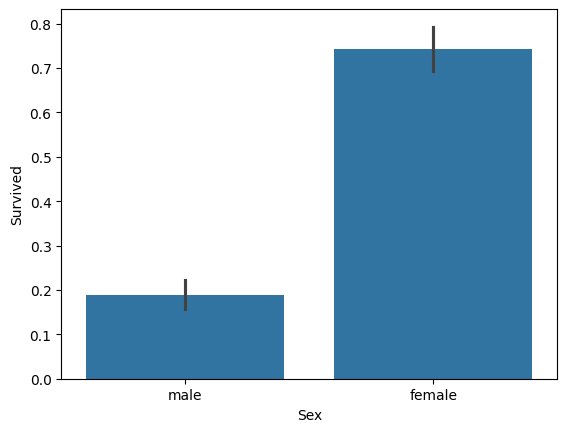

In [16]:
sns.barplot(x = 'Sex', y = 'Survived', data = df)

<Axes: xlabel='Pclass', ylabel='Survived'>

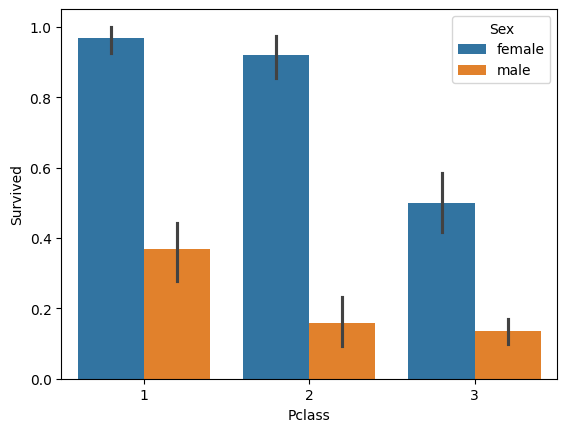

In [17]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df)

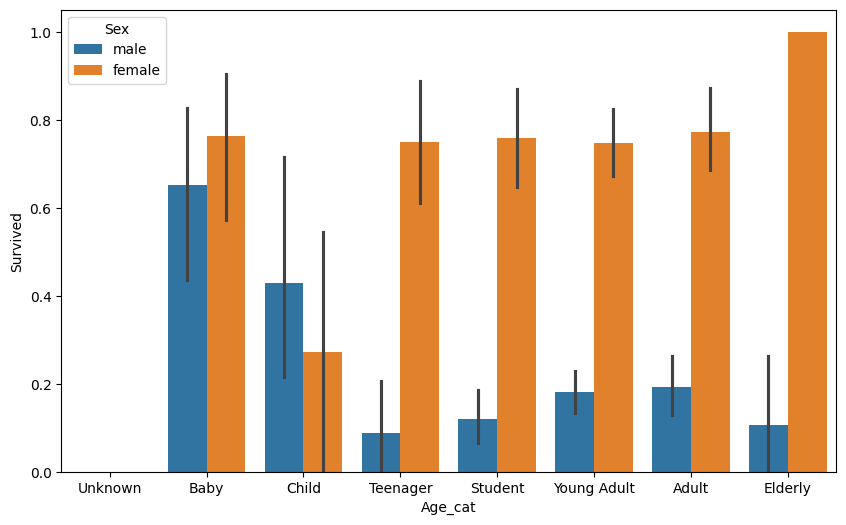

In [18]:
def get_category(age):
    cat = ''
    if(age <= -1): cat = 'Unknown'
    elif(age <= 5): cat = 'Baby'
    elif(age <= 12): cat = 'Child'
    elif(age <= 18): cat = 'Teenager'
    elif(age <= 25): cat = 'Student'
    elif(age <= 35): cat = 'Young Adult'
    elif(age <= 60): cat = 'Adult'
    else: cat = 'Elderly'

    return cat

plt.figure(figsize = (10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

df['Age_cat'] = df['Age'].apply(lambda x: get_category(x))

sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = df, order = group_names)

df.drop('Age_cat', axis = 1, inplace = True, errors = 'ignore')

In [19]:
from sklearn.preprocessing import LabelEncoder

def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        df[feature] = encoder.fit_transform(df[feature])

    return df

df = encode_features(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [22]:
def fillna(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')   
    df['Embarked'] = df['Embarked'].fillna('N')
    df['Fare'] = df['Fare'].fillna(0)
    return df

# 머신러닝 알고리즘에서 불필요한 피쳐 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True, errors = 'ignore')
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        df[feature] = encoder.fit_transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df
 

In [23]:
# 원본 데이터를 재로딩하고, 피쳐 데이터 세트와 레이블 데이터 세트 추출
df = pd.read_csv('../data/titanic.csv')

y = df['Survived']
X = df.drop('Survived', axis = 1)

X = transform_features(X)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 11)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤포레스트, 로지스틱회귀를 위한 Classifier 클래스 생성
df_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(solver = 'liblinear')

# DecisionTree
df_clf.fit(X_train, y_train)
df_pred = df_clf.predict(X_test)
print('DecisionClassifier: {}'.format(accuracy_score(df_pred, y_test)))

# RandomForest
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForest: {}'.format(accuracy_score(rf_pred, y_test)))

# LogisticRegression
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression: {}'.format(accuracy_score(lr_pred, y_test)))

DecisionClassifier: 0.7877094972067039
RandomForest: 0.8547486033519553
LogisticRegression: 0.8659217877094972
